In [138]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [104]:
df = pd.read_csv(r"D:\STUDY\MACHINE_LEARNING\4 ridge lasso and elastic net\Algerian_forest_fires_dataset.csv")

In [105]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [106]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [107]:
df=df.drop(['day','month', 'year'],axis=1)

In [108]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [109]:
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,245,245,245,245,245,245,245,245,245,245,244
unique,20,63,19,40,174,167,199,107,175,127,9
top,35,55,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,29,10,43,133,8,5,5,8,5,12,131


In [110]:
df["Classes  "].value_counts()

Classes  
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
Classes            1
not fire           1
not fire           1
Name: count, dtype: int64

In [111]:
df['Classes  ']=np.where(df['Classes  '].str.contains("not fire"),0,1)

In [112]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0


In [113]:
df["Classes  "].value_counts()

Classes  
1    138
0    109
Name: count, dtype: int64

In [114]:
print(df.isnull().sum())

Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        0
dtype: int64


In [115]:
df = df.dropna()


In [117]:
df.isnull().sum()

Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [118]:
df=df.apply(pd.to_numeric , errors="coerce")

In [119]:
df.isnull().sum()

Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             2
ISI            1
BUI            1
FWI            2
Classes        0
dtype: int64

In [121]:
df=df.dropna()

In [122]:
df.isnull().sum()

Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [128]:
x=df.drop("FWI",axis=1)
y=df["FWI"]

In [129]:
x.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.516015
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.432161
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,-0.069964
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.379097
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.769492
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.585658
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.511123
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.735197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.586639
Classes,0.516015,-0.432161,-0.069964,-0.379097,0.769492,0.585658,0.511123,0.735197,0.586639,1.000000


In [131]:
print(x.shape,y.shape)

(243, 10) (243,)


In [132]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0


<Axes: >

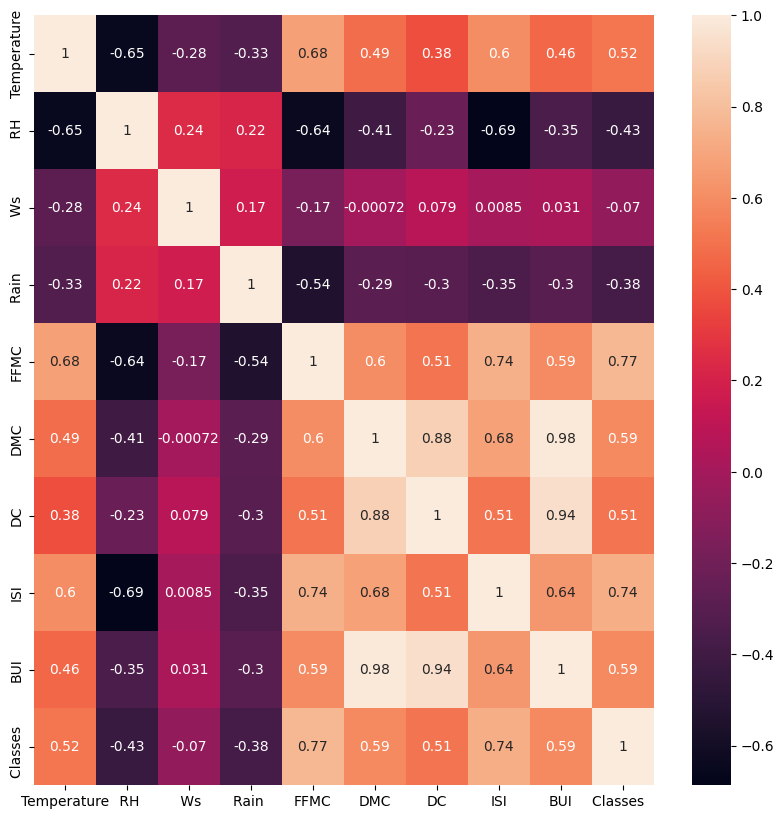

In [139]:
plt.figure(figsize=(10,10))
corr=x.corr()
sns.heatmap(corr, annot=True)

In [140]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)